# Chapter 5. Random walk: diffusion of particles

___Animation showing the random diffusion of particles from any initial arrangement.___

<IPython.core.display.Javascript object>


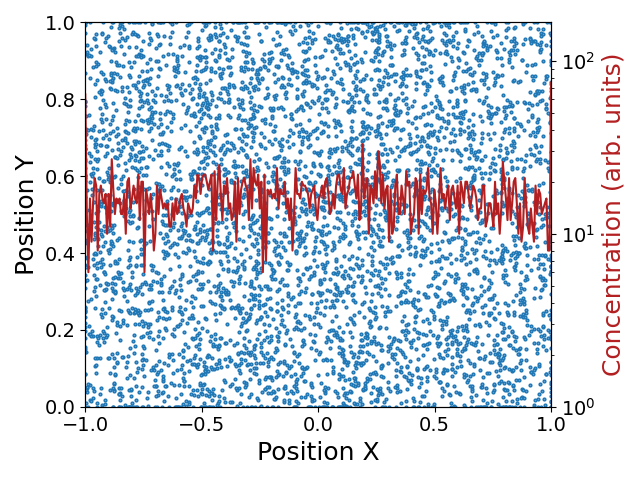

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import random

#Necessary to see the animated plot
%matplotlib notebook  

DATA_SIZE = 5000   #How many particles to animate. The more, the slower this code runs!!

# Limits of the diffusion area.
# The atoms will diffuse inside this area.
limitX1 = -1
limitX2 = 1
limitY1 = 0
limitY2 = 1

# Initial area where the atoms are
# You can change this area to visualize diffusion from
# different locations
initX1 = -0.1
initX2 = 0.1
initY1 = 0
initY2 = 1

# How to distribute the atoms initially.
number_of_x = 20  # Number of atom columns
max_atoms_at_x = int(DATA_SIZE/number_of_x)   # Atoms per column

# Distance the atoms jump per step
step = 0.05
# Time for each jump. Change it if you want to see a faster/slower movement
time_interval = 100 #ms

# Histogram showing the diffusion profile
# Number of bins for the histogram
nBins = 300
conc_vs_X = np.zeros((nBins,2))
conc_vs_X[:,0] = np.linspace(limitX1, limitX2, nBins)


# Data: (x,y) for each atom
data = np.zeros((DATA_SIZE,2))
# Initial position of the atoms
for x in range(number_of_x):
    pos1 = x*max_atoms_at_x
    pos2 = x*max_atoms_at_x + max_atoms_at_x
    data[pos1:pos2, 0] = initX1 + x*(initX2-initX1)/(number_of_x-1)
    data[pos1:pos2, 1] = np.linspace(initY1, initY2, max_atoms_at_x)

# Plot
fig = plt.figure()

ax = fig.add_subplot(autoscale_on=False)
ax.set_xlabel('Position X', size=18)
ax.set_ylabel('Position Y', size=18)
ax.tick_params(axis='both', which='major', labelsize=14)
trace, = ax.plot(data[:,0], data[:,1], marker='o', linestyle='', markerfacecolor='#5FA1D8', lw=1, ms=2, )

ax.set_ylim(limitY1,limitY2)
ax.set_xlim(limitX1,limitX2)

ax2 = ax.twinx()
ax2.set_ylabel('Concentration (arb. units)', size=18, color='#B31F20')
ax2.tick_params(axis='y', which='major', labelsize=14)
maxAtomsInBin = DATA_SIZE/((initX2-initX1)/((limitX2-limitX1)/nBins))
ax2.set_ylim(1, maxAtomsInBin)
ax2.set_yscale('log')
traceConc, = ax2.plot(conc_vs_X[:,0], conc_vs_X[:,1], linestyle='-', color='#B31F20')

plt.tight_layout()

# Function called by animation.FuncAnimation to move all the atoms step by step.
def animate(i):
    #sizeData = data.shape
    #for x in range(sizeData[0]):
    for x in range(data.shape[0]):
        # Pick a random angle for movement
        angle = np.random.uniform(0, 2*math.pi)
        # Step the x-coordinate
        data[x,0] += step*math.sin(angle)
        # Do not let atoms go out the area!
        if data[x,0]> limitX2:
            data[x,0]=limitX2
        elif data[x,0]< limitX1:
            data[x,0]=limitX1
        # Step the y-coordinate 
        data[x,1] += step*math.cos(angle)
        # Do not let atoms go out the area!
        if data[x,1]> limitY2:
            data[x,1]=limitY2
        elif data[x,1]< limitY1:
            data[x,1]=limitY1
    
    # Change the data of the trace
    trace.set_data(data[:,0],data[:,1])
    
    # Calculate the new histogram
    histo, binEdges = np.histogram(data[:,0], nBins, (limitX1, limitX2))
    # Change the data of the histogram     
    traceConc.set_data(conc_vs_X[:,0],histo)
    
# This runs forever!.
ani = animation.FuncAnimation(
    fig, animate, interval=time_interval, blit=True)

 


